### 02 Email Classifier


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
ds = pd.read_csv("emails.csv")
ds.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# data preprocessing
# remove the unwanted columns

ds = ds.drop(columns=["Email No."])
ds.head()

# gather labels in a sepearate array
labels = ds["Prediction"].values


# remove labeles from dataset
ds.drop(columns=["Prediction"])

features = ds.values

In [5]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4137, 3001)
(4137,)
(1035, 3001)
(1035,)


#### KNN Classification

0.8657004830917875
0.8753623188405797
0.8724637681159421
[[671  68]
 [ 61 235]]


<Axes: >

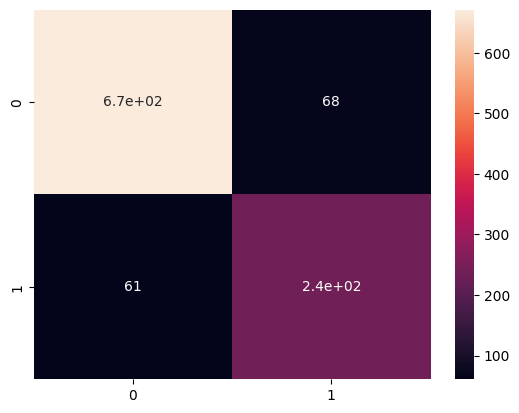

In [18]:
# Binary classification with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report


# knn
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train, y_train)
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train, y_train)

y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)
y_pred3 = knn3.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

# print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

#### Binary Classification with SVMs

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       0.99      1.00      0.99       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



<Axes: >

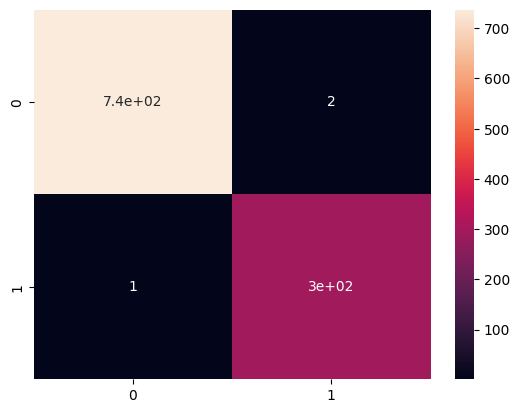

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)